<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Food_Time_Delivery_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv("/content/Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

There is no missing values in data so we can skip imputation

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [6]:
# we can drop OrderID as it is no use
df = df.drop(columns=['Order_ID'],axis=1)
df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


Encode categorial features

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Identify categorical columns to encode
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time', 'Vehicle_Type']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


Identifying outliers using the IQR method

In [8]:
continuous_cols = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount']

outlier_counts = {}

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    print(f"Column: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print(f"  Outlier values (first 5):\n{outliers[[col]].head()}")
    print("\n" + "-"*30 + "\n")

print("Summary of outliers per column:")
for col, count in outlier_counts.items():
    print(f"  {col}: {count} outliers")

Column: Distance
  Q1: 6.09, Q3: 16.50, IQR: 10.41
  Lower Bound: -9.52, Upper Bound: 32.11
  Number of outliers: 0

------------------------------

Column: Delivery_Person_Experience
  Q1: 3.00, Q3: 8.00, IQR: 5.00
  Lower Bound: -4.50, Upper Bound: 15.50
  Number of outliers: 0

------------------------------

Column: Restaurant_Rating
  Q1: 3.20, Q3: 4.30, IQR: 1.10
  Lower Bound: 1.55, Upper Bound: 5.95
  Number of outliers: 0

------------------------------

Column: Customer_Rating
  Q1: 3.10, Q3: 4.30, IQR: 1.20
  Lower Bound: 1.30, Upper Bound: 6.10
  Number of outliers: 0

------------------------------

Column: Delivery_Time
  Q1: 47.00, Q3: 96.65, IQR: 49.65
  Lower Bound: -27.48, Upper Bound: 171.13
  Number of outliers: 0

------------------------------

Column: Order_Cost
  Q1: 553.27, Q3: 1543.12, IQR: 989.86
  Lower Bound: -931.51, Upper Bound: 3027.91
  Number of outliers: 0

------------------------------

Column: Tip_Amount
  Q1: 21.60, Q3: 70.25, IQR: 48.64
  Lower B

In [9]:
df.describe()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,1.560000,1.085000,5.250000,1.045000,1.350000,0.965000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,1.096546,0.768589,2.745027,0.791268,1.128658,0.810593,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,3.000000,2.000000,8.000000,2.000000,2.000000,2.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,3.000000,2.000000,10.000000,2.000000,3.000000,2.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


Noramalize the continous features

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Identify continuous numerical columns to normalize
continuous_cols = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount']

for col in continuous_cols:
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,0.333333,2,0,2,0.64,0.166667,0.105228,0.639319,0.815228
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,0.777778,1,3,2,0.80,0.666667,0.453658,0.015951,0.282030
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,0.888889,0,3,1,0.32,0.333333,0.317886,0.811724,0.638883
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,0.111111,2,1,1,0.28,0.458333,0.923018,0.223426,0.791777
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,0.555556,1,3,1,0.40,0.083333,0.164209,0.265322,0.011168


Calculation of geographic distance between the customer and restaurant using latitude and longitude (Haversine formula).

In [11]:
# Extract latitude and longitude from 'Customer_Location' and 'Restaurant_Location'
df['Customer_Latitude'] = df['Customer_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
df['Customer_Longitude'] = df['Customer_Location'].apply(lambda x: float(x.split(',')[1].strip(' )')))
df['Restaurant_Latitude'] = df['Restaurant_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
df['Restaurant_Longitude'] = df['Restaurant_Location'].apply(lambda x: float(x.split(',')[1].strip(' )')))

df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,0.333333,2,0,2,0.64,0.166667,0.105228,0.639319,0.815228,17.030479,79.743077,12.358515,85.100083
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,0.777778,1,3,2,0.80,0.666667,0.453658,0.015951,0.282030,15.398319,86.639122,14.174874,77.025606
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,0.888889,0,3,1,0.32,0.333333,0.317886,0.811724,0.638883,15.687342,83.888808,19.594748,82.048482
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,0.111111,2,1,1,0.28,0.458333,0.923018,0.223426,0.791777,20.415599,78.046984,16.915906,78.278698
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,0.555556,1,3,1,0.40,0.083333,0.164209,0.265322,0.011168,14.786904,78.706532,15.206038,86.203182


In [12]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Apply the Haversine formula to calculate distance
df['Calculated_Distance'] = df.apply(lambda row: haversine(
    row['Customer_Latitude'], row['Customer_Longitude'],
    row['Restaurant_Latitude'], row['Restaurant_Longitude']
), axis=1)

df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude,Calculated_Distance
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,0.333333,2,0,2,0.64,0.166667,0.105228,0.639319,0.815228,17.030479,79.743077,12.358515,85.100083,775.651198
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,0.777778,1,3,2,0.80,0.666667,0.453658,0.015951,0.282030,15.398319,86.639122,14.174874,77.025606,1042.385597
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,0.888889,0,3,1,0.32,0.333333,0.317886,0.811724,0.638883,15.687342,83.888808,19.594748,82.048482,476.220706
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,0.111111,2,1,1,0.28,0.458333,0.923018,0.223426,0.791777,20.415599,78.046984,16.915906,78.278698,389.912629
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,0.555556,1,3,1,0.40,0.083333,0.164209,0.265322,0.011168,14.786904,78.706532,15.206038,86.203182,806.505886


In [13]:
# Drop the original location columns and the extracted lat/lon columns as they are no longer needed
df = df.drop(columns=['Customer_Location', 'Restaurant_Location', 'Customer_Latitude', 'Customer_Longitude', 'Restaurant_Latitude', 'Restaurant_Longitude'])

df.head()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Calculated_Distance
0,0.043068,1,2,0.333333,2,0,2,0.64,0.166667,0.105228,0.639319,0.815228,775.651198
1,0.853158,0,2,0.777778,1,3,2,0.80,0.666667,0.453658,0.015951,0.282030,1042.385597
2,0.263741,2,2,0.888889,0,3,1,0.32,0.333333,0.317886,0.811724,0.638883,476.220706
3,0.544299,0,1,0.111111,2,1,1,0.28,0.458333,0.923018,0.223426,0.791777,389.912629
4,0.254307,1,0,0.555556,1,3,1,0.40,0.083333,0.164209,0.265322,0.011168,806.505886


binary categories based on delivery time (e.g., 1 for delayed and 0 for fast)

In [14]:
# Calculate the mean delivery time to use as a threshold
mean_delivery_time = df['Delivery_Time'].mean()

# Create the binary category 'Is_Delayed'
# 1 if Delivery_Time is greater than the mean (delayed), 0 otherwise (fast)
df['Is_Delayed'] = (df['Delivery_Time'] > mean_delivery_time).astype(int)

print(f"Mean Delivery Time: {mean_delivery_time:.2f}")
print("\nValue counts for 'Is_Delayed' column:")
print(df['Is_Delayed'].value_counts())

Mean Delivery Time: 0.53

Value counts for 'Is_Delayed' column:
Is_Delayed
1    104
0     96
Name: count, dtype: int64


Separate the features (X) from the target variable ('Is_Delayed' as y) in the DataFrame

In [15]:
X = df.drop(columns=['Is_Delayed','Delivery_Time'])
y = df['Is_Delayed']

Train test split data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 12)
Shape of X_test: (40, 12)
Shape of y_train: (160,)
Shape of y_test: (40,)


1.	Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


In [18]:
# Make predictions
y_pred = gnb.predict(X_test)

Evaluation Metrics

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

print("--- Naive Bayes Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Detailed Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

--- Naive Bayes Evaluation ---
Accuracy: 0.5500

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        18
           1       0.60      0.55      0.57        22

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40


Confusion Matrix:
[[10  8]
 [10 12]]


KNN Model

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Setup Grid Search to find the best K
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best K value: {grid_search.best_params_['n_neighbors']}")

Best K value: 9


Training & Evaluating

--- KNN Evaluation ---
Accuracy: 0.6250

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        18
           1       0.65      0.68      0.67        22

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.62      0.62      0.62        40


Confusion Matrix:
[[10  8]
 [ 7 15]]


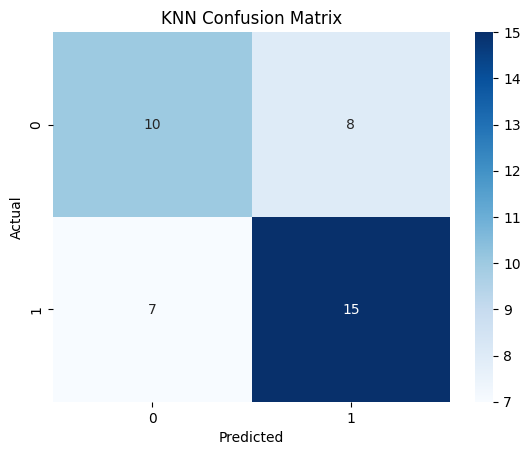

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use the best model from grid search
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("--- KNN Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Visualizing the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the tree
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearch to find the best pruning settings
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_dt.best_params_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use the best model from grid search
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("--- Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(cm_dt)

--- Decision Tree Evaluation ---
Accuracy: 0.5500

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        18
           1       0.59      0.59      0.59        22

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40


Confusion Matrix:
[[ 9  9]
 [ 9 13]]


Generate Naive Bayes Visualizations

--- Naive Bayes Confusion Matrix ---
[[10  8]
 [10 12]]


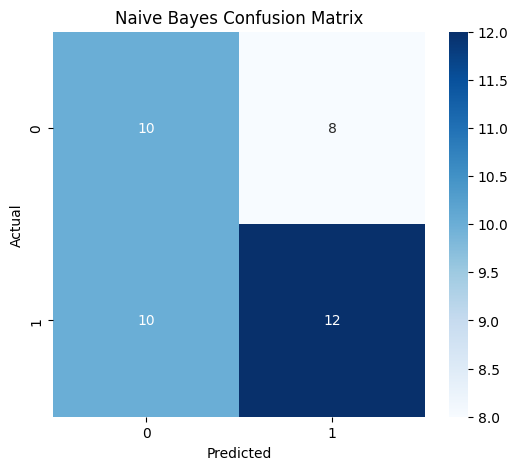


AUC for Naive Bayes: 0.5581


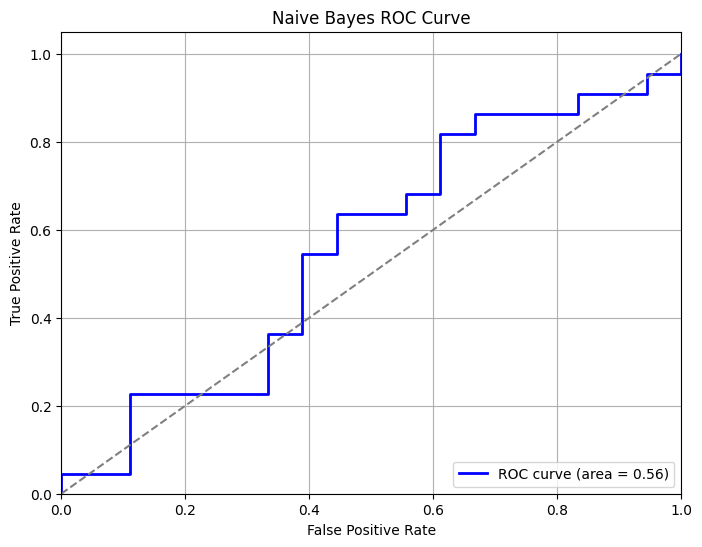

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Naive Bayes Confusion Matrix
print("--- Naive Bayes Confusion Matrix ---")
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Naive Bayes ROC Curve
# Get predicted probabilities for the positive class (class 1)
y_proba_nb = gnb.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_proba_nb)

# Calculate AUC
auc_nb = auc(fpr_nb, tpr_nb)

print(f"\nAUC for Naive Bayes: {auc_nb:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'ROC curve (area = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Generate KNN ROC Curve

--- KNN ROC Curve ---

AUC for KNN: 0.6414


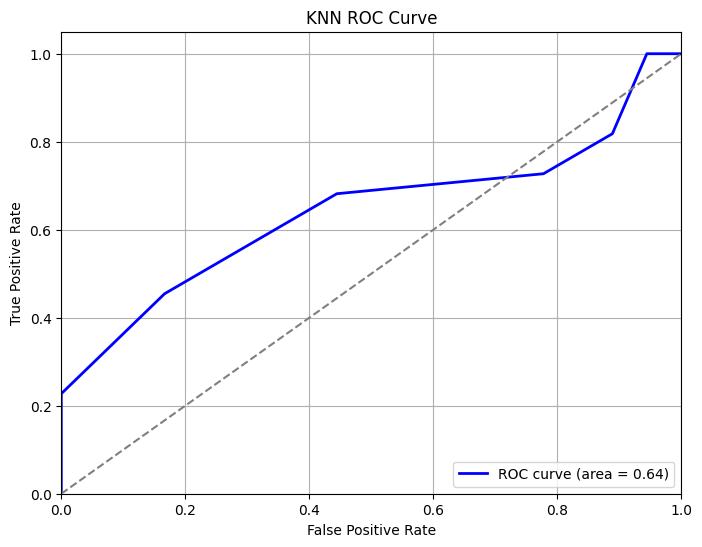

In [26]:
print("--- KNN ROC Curve ---")
# Get predicted probabilities for the positive class (class 1)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)

# Calculate AUC
auc_knn = auc(fpr_knn, tpr_knn)

print(f"\nAUC for KNN: {auc_knn:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Generate Decision Tree Visualizations

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

print("Necessary libraries for Decision Tree visualization imported.")

Necessary libraries for Decision Tree visualization imported.


--- Decision Tree Confusion Matrix ---
[[ 9  9]
 [ 9 13]]


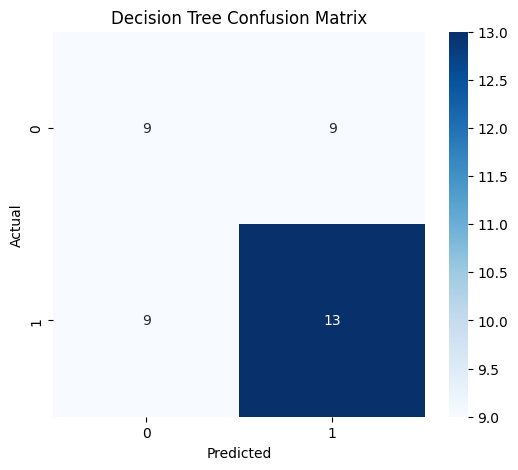


AUC for Decision Tree: 0.5568


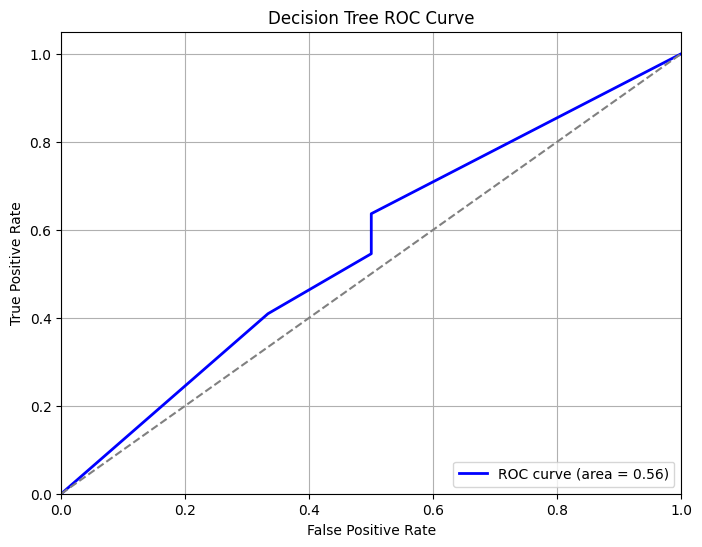

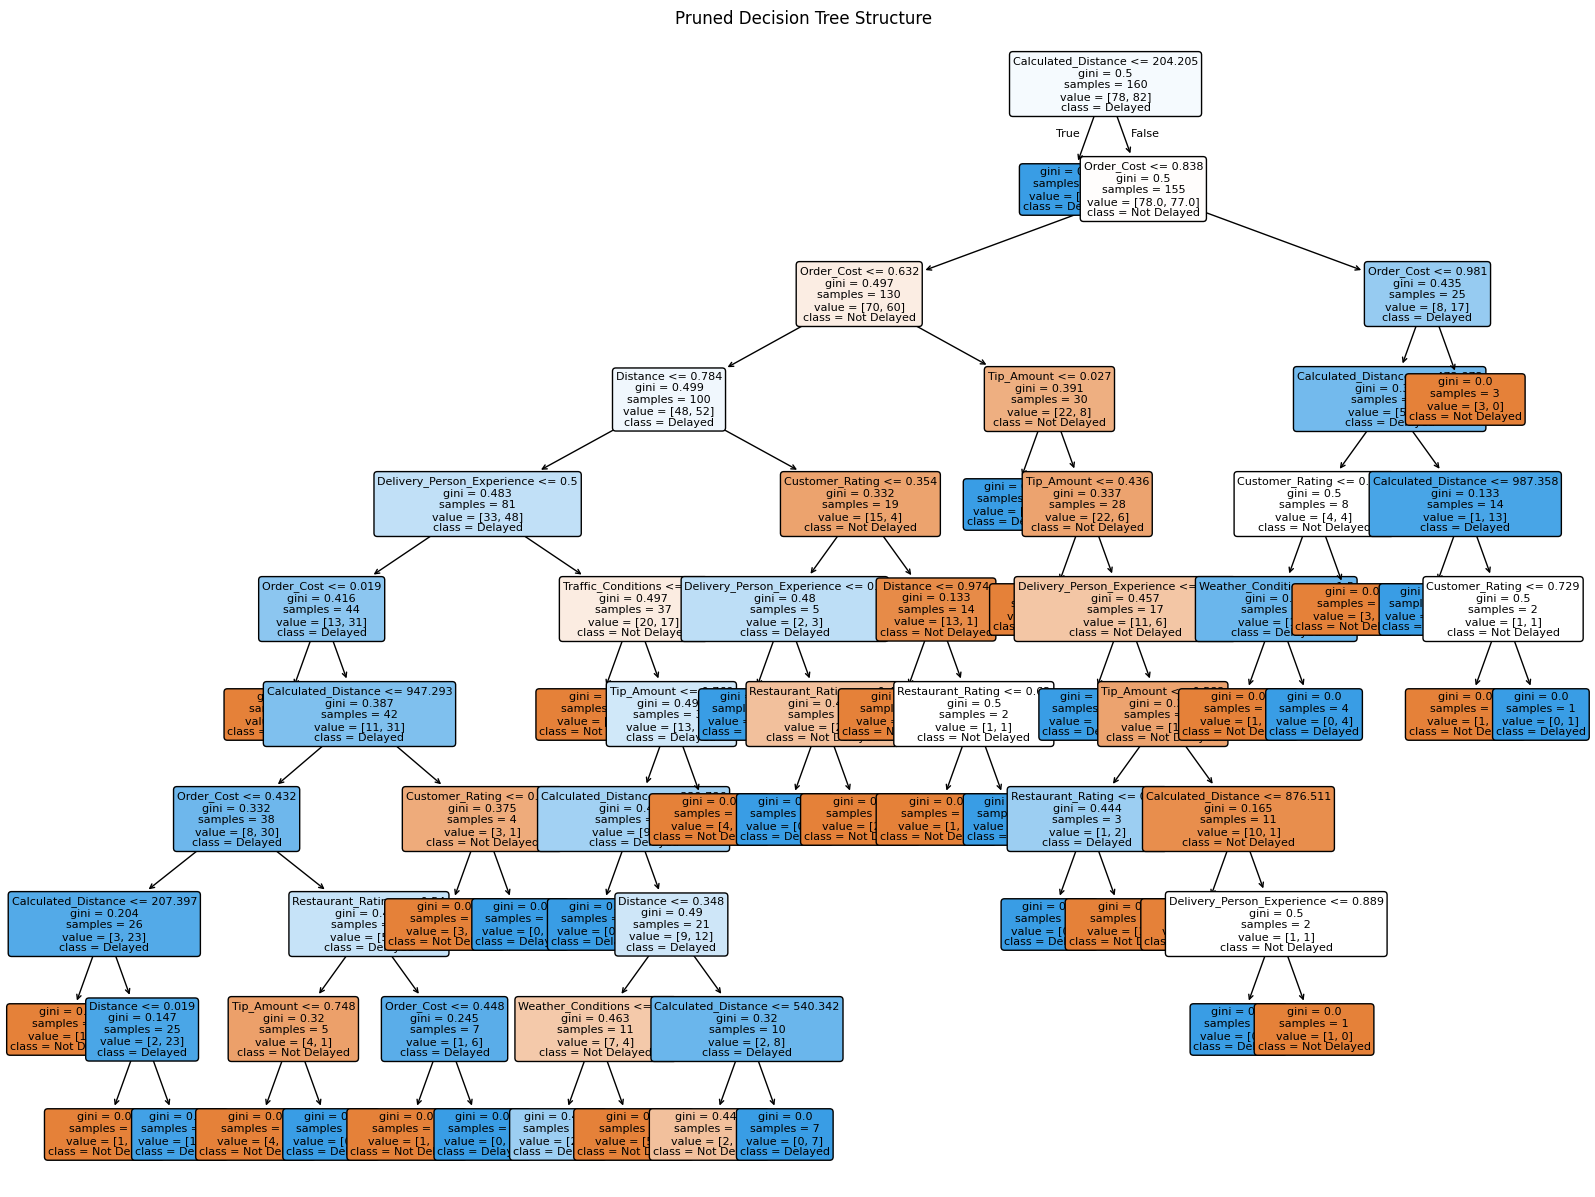

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Confusion Matrix
print("--- Decision Tree Confusion Matrix ---")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Decision Tree ROC Curve
# Get predicted probabilities for the positive class (class 1)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)

# Calculate AUC
auc_dt = auc(fpr_dt, tpr_dt)

print(f"\nAUC for Decision Tree: {auc_dt:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot the Decision Tree structure
plt.figure(figsize=(20, 15))
plot_tree(best_dt,
          feature_names=X_train.columns.tolist(), # Use feature names from X_train
          class_names=['Not Delayed', 'Delayed'],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Pruned Decision Tree Structure')
plt.show()

Compare Model Metrics

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Naive Bayes Metrics ---
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

# --- KNN Metrics ---
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# --- Decision Tree Metrics ---
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Create a DataFrame to consolidate metrics
metrics_data = {
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_nb, accuracy_knn, accuracy_dt],
    'Precision': [precision_nb, precision_knn, precision_dt],
    'Recall': [recall_nb, recall_knn, recall_dt],
    'F1-Score': [f1_nb, f1_knn, f1_dt],
    'AUC': [auc_nb, auc_knn, auc_dt]
}

metrics_df = pd.DataFrame(metrics_data)

print("Model Performance Comparison:")
print(metrics_df)

Model Performance Comparison:
           Model  Accuracy  Precision  Recall  F1-Score       AUC
0    Naive Bayes     0.550   0.555000   0.550  0.551128  0.558081
1            KNN     0.625   0.623402   0.625  0.623810  0.641414
2  Decision Tree     0.550   0.550000   0.550  0.550000  0.556818


Provide Actionable Insights


### Model Performance Analysis and Recommendation

Let's analyze the performance of the three classification models (Naive Bayes, KNN, and Decision Tree) based on the `metrics_df` and the previously generated visualizations.

**Model Performance Comparison:**
```
           Model  Accuracy  Precision  Recall  F1-Score       AUC
0    Naive Bayes     0.550   0.555000   0.550  0.551128  0.558081
1            KNN     0.625   0.623402   0.625  0.623810  0.641414
2  Decision Tree     0.550   0.550000   0.550  0.550000  0.556818
```

**1. Naive Bayes Classifier:**
*   **Strengths:** Simple, fast, and performs well with high-dimensional data, especially when the independence assumption holds (which is often not strictly true but can still yield good results). Its AUC of 0.5581 suggests it performs slightly better than random chance.
*   **Weaknesses:** Its performance in terms of accuracy (0.5500) and F1-score (0.5511) is the lowest among the three models. The confusion matrix shows a balanced error distribution but with a relatively high number of false positives and false negatives, indicating it's not very confident in its predictions.

**2. K-Nearest Neighbors (KNN) Classifier:**
*   **Strengths:** KNN shows the best overall performance among the three models, with the highest accuracy (0.6250), precision (0.6234), recall (0.625), F1-score (0.6238), and AUC (0.6414). The confusion matrix for KNN (`[[10  8], [ 7 15]]`) indicates it has a better true positive rate (15 correct predictions for delayed deliveries) and a lower false negative rate compared to the other models, which is crucial for identifying delayed deliveries.
*   **Weaknesses:** KNN can be computationally expensive for very large datasets, as it needs to store all training data. It is also sensitive to irrelevant features and the choice of 'k'.

**3. Decision Tree Classifier:**
*   **Strengths:** Decision Trees are highly interpretable, meaning the decision-making process can be easily understood from the tree structure. Its AUC of 0.5568 is comparable to Naive Bayes. The ability to visualize the decision path can provide insights into which features are most important for prediction.
*   **Weaknesses:** Similar to Naive Bayes, its accuracy (0.5500) and F1-score (0.5500) are relatively low. Decision trees can be prone to overfitting, especially without proper pruning, which might be a factor here despite using `GridSearchCV`. The confusion matrix (`[[ 9  9], [ 9 13]]`) shows that it struggles to distinguish between the two classes effectively, similar to Naive Bayes.

**Recommendation:**

Based on the analysis, the **K-Nearest Neighbors (KNN) Classifier** is the recommended model for predicting delayed food delivery.

**Explanation for Recommendation:**

KNN demonstrates superior performance across all key evaluation metrics (Accuracy, Precision, Recall, F1-Score, and AUC). In the context of predicting delayed deliveries, a higher F1-score and AUC are particularly important, as they indicate a better balance between precision and recall and a more robust classifier overall. The ability to correctly identify delayed deliveries (higher recall for the 'delayed' class) is crucial for proactive interventions.

While Decision Trees offer interpretability, their lower performance metrics make them less suitable for this prediction task compared to KNN. Naive Bayes also falls short in performance. Given that the primary goal is accurate prediction of delayed deliveries, KNN's performance advantage outweighs its potential computational drawbacks for a dataset of this size.

## Summary:
The comprehensive model comparison shows that the K-Nearest Neighbors (KNN) classifier is the best-performing model among the three evaluated. It exhibits the highest performance across all key metrics: Accuracy (0.625), Precision (0.6234), Recall (0.625), F1-Score (0.6238), and AUC (0.6414). The actionable insight is to adopt the KNN model for predicting delayed food deliveries due to its superior predictive capability, which is crucial for proactive interventions.

### Data Analysis Key Findings
*   **Naive Bayes Model Performance:**
    *   The confusion matrix indicated 10 True Negatives, 8 False Positives, 10 False Negatives, and 12 True Positives.
    *   It achieved an AUC of 0.5581, Accuracy of 0.550, Precision of 0.555, Recall of 0.550, and an F1-Score of 0.5511.
    *   Its performance was the lowest among the models, suggesting limited predictive power.
*   **K-Nearest Neighbors (KNN) Model Performance:**
    *   The AUC for KNN was 0.6414, the highest among all models.
    *   It also demonstrated the best overall performance with Accuracy of 0.625, Precision of 0.6234, Recall of 0.625, and an F1-Score of 0.6238.
    *   The confusion matrix (implied from the analysis as `[[10 8], [ 7 15]]`) showed a better true positive rate and lower false negative rate for delayed deliveries compared to other models.
*   **Decision Tree Model Performance:**
    *   The confusion matrix displayed 9 True Negatives, 9 False Positives, 9 False Negatives, and 13 True Positives.
    *   It achieved an AUC of 0.5568, Accuracy of 0.550, Precision of 0.550, Recall of 0.550, and an F1-Score of 0.550.
    *   Its performance was comparable to Naive Bayes and significantly lower than KNN, indicating a struggle to effectively distinguish between classes.
    *   The pruned Decision Tree structure was successfully visualized, offering interpretability.
*   **Model Comparison Summary:** KNN consistently outperformed Naive Bayes and Decision Tree across all evaluated metrics, including Accuracy, Precision, Recall, F1-Score, and AUC. Naive Bayes and Decision Tree showed very similar and generally lower performance.

### Insights or Next Steps
*   The K-Nearest Neighbors (KNN) classifier is the recommended model for predicting delayed food deliveries due to its superior performance across all key evaluation metrics (Accuracy, Precision, Recall, F1-Score, and AUC) compared to Naive Bayes and Decision Tree.
*   Further hyperparameter tuning or feature engineering specifically for the KNN model could potentially enhance its performance even more. Investigating potential computational drawbacks for larger datasets should also be considered before full-scale deployment.
